# Problem : 02 : Gender recognition from Bangla handwritten digits

In this problem the **"Ekush"** dataset is used to recognize Male/Female from the Bangla handwritten digits. Only logistic regression is used to build this binary classification model.

The Ekush dataset provides annoted data for the problem and has total of 30803 data samples. The training and testing samples are divided in **90:10** ratio. 

**Snapshot from Ekush**

<div align="center">
<img src="https://drive.google.com/uc?id=1GhuJfYchOjfNoBtwkpWivPRQinegMYwy" width="600">
</div>

- **Input dimension:**
  - Size of image: $28 \times 28 = 784$

- **Output dimension: 2**
  - 0, 1 [Female,Male]

For this particular problem we have used *different hyperparameters* like - batch size, number of iterations, learning rate , optimizer etc to get the best results. The combination of hyperparameters and their acquired accuracy is given below - 

| Hyperparameters| Setting 1| Setting 2  | Setting 3 | Setting 4  |Setting 5 |
| :-------------:| :------: | :--------: | :-------: | :--------: | :------: |
| Batch size     |   100    |    150     |     50    |     50     |    150   |
|No. of iterations| 3000    |    3000    |    3000   |    3000    |   4000   |
| Epoch          |  9.73    |    14.59   |    4.86   |    4.86    |   19.46  |
| Learning Rate  |  0.001   |    0.002   |    0.002  |    0.002   |   0.005  |
| Optimizer      |  SGD     |    SGD     |    SGD    |   Adagrad  |   SGD    |
| Accuracy       |  58.709  |    59.292  |    59.130 |   59.844   |   60.330 |

                                                    Table : Results of different hyperparameter setting

> From the table we can see the incremental results for each setting. The hyperparameters play an impactful role in the accuracy of model that is why tuning them right is an important thing to do. This experiment is done to get some basic intutives on the effects of hyperparameters. 


In **Setting 1** - I have taken the basic values of hyperparameters where the batch size is **100** and started the learning rate at **0.001**. in every setting **SGD** optimizer performs better or same as others that is why it is used more. The model achieves an accuracy of **58.709** with the **3000** iterations and **9.73** epochs. 

In **Setting 2** I have increased the learning rate by a little - **0.002** and increased the batch size to **150**. Increased batch size helps in speeding up computations and increasing learning rate creates a chance of faster updates of weights and learning quickly so the accuracy acquired is **59.292** for **3000** iterations and **14.59** epochs. The **cross entropy loss** increases with last two iterations. 

  ![picture](https://drive.google.com/uc?id=1NJxL-eva2YbXX5Ff1qOkg99vmKzC2L4t)![picture](https://drive.google.com/uc?id=1VhdD3ZMiX5npr97RvXxyeRL9eqIIYhRP)

                        Figure: Cross entropy loss  of setting-1 and setting-2 



For **Setting-3** the other hyperparameers are all same but the batch size is decreased to **50**. The accuracy also decreases to **59.130** which shows that less batch size does not guarantee to reach global optima. And it does not show improving results. The **loss** gradually **decreases** in this setting. 

**Setting-4** shows that if we change the optimizer to **Adagrad** the accuracy is increased to **59.844**. Adagrad generally works well with sparse data and it improved the SGD results. However, the **loss** gradually increases with every iteration.

  ![picture](https://drive.google.com/uc?id=1O7iZ_xQKuMsEP-b2OOOH6MHfrVbJZieY)![picture](https://drive.google.com/uc?id=1c8WXQm5_i5wvvaQgCAWGXZjUM5n_FQbL)

                        Figure: Cross entropy loss  of setting-3 and setting-4 

Fo this problem I have experimented with different setups and have seen a prominent result for **higher** batch size and **higher** learning rate. After experimenting for a while it is seen that the **Setting-5** gives better results than others. The batch size is **150** as increasing the batch size more to 256 or more gives a average results. I have increased the learning rate to **0.005** and the iteration number to **4000**. The **SGD** optimizer works best with this setup and gives an accuracy of **60.330** after **3500** iterations. 

  ![picture](https://drive.google.com/uc?id=1ZjLphu6z7o30lZtGz9yn1c2G0bzrXgsw)

       Figure: Cross entropy loss  of setting-5


> After these experiments we can come to a conclusion that increasing the batch size gives a good computational result. But bigger batch size gives a poor generalization wheras very small batch size gives convex problems. Learning too slowly or too quickly is not good for the experiment. All the optimizers gives nearly same results for this problem. But this whole experiment gives us a conclusion that by perfectly tuning the hyperparameters binary classification model with logisitic regression can give better results. Moreover, gender recognition is possible with Bangla handwritten digits. 

##Implementation : 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import PIL
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
df_female = pd.read_csv('/drive/My Drive/Colab Notebooks/SC_Lab_Assignments/femaleDigits.csv')
df_male = pd.read_csv('/drive/My Drive/Colab Notebooks/SC_Lab_Assignments/maleDigits.csv')
df_male.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,252,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,112
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,112
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,194,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,112
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,167,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,112
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,112


In [ ]:
df_female['label'] = 'Female'
df_male['label'] = 'Male'
df_female.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,Female
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,255,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,Female
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,Female
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,36,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,Female
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,235,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,Female


In [ ]:
dframes = [df_female, df_male]
dataset2 = pd.concat(dframes)
print(len(dataset2))

30830


In [ ]:
dataset2.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,Female
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,255,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,Female
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,Female
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,36,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,Female
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,235,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,Female


In [ ]:
dataset2['label'] = dataset2['label'].astype('category')
dataset2.label = dataset2.label.cat.rename_categories([0,1]) #0-female , 1-male
#print (dataset2['label'].cat.categories)
dataset2.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,0
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,255,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,0
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,0
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,36,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,0
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,235,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,0


In [ ]:
from sklearn.utils import shuffle
dataset2 = shuffle(dataset2)

In [ ]:
# Separating Data and Label
Y = dataset2["label"]
X = dataset2.drop(labels = ["label"],axis = 1)

# Normalize the data
X = X / 255.0

# Reshape the array into 28 x 28 pixel
X = X.values.reshape(-1,28,28,1)

In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

27747
27747
3083
3083


In [ ]:
train_dataset = list(zip(X_train,y_train))
test_dataset = list(zip(X_test,y_test))

### Setting-1  : 

- **totaldata:** 30830
- **minibatch:** 100
- **iterations:** 3,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{30830}{100} = 9.73 $
- **Learning rate:** 0.001
- **Optimizer:** SGD

In [ ]:
#HYPERPERAMETERS
batch_size = 100
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

### Desigining model class

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

### Constructing loss and optimizer

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


### Training ,forward,loss,step

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.7017648816108704. Accuracy: 53.25981187155368
Iteration: 1000. Loss: 0.6971154808998108. Accuracy: 55.07622445669802
Iteration: 1500. Loss: 0.7018786668777466. Accuracy: 57.7684073953941
Iteration: 2000. Loss: 0.6757659912109375. Accuracy: 58.06033084657801
Iteration: 2500. Loss: 0.6659129858016968. Accuracy: 58.709049626986705


[0.7017648816108704, 0.6971154808998108, 0.7018786668777466, 0.6757659912109375, 0.6659129858016968]


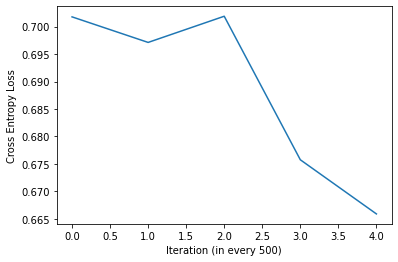

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Setting-2  : 

- **totaldata:** 30830
- **minibatch:** 150
- **iterations:** 3,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{30830}{150} = 14.59 $
- **Learning rate:** 0.002
- **Optimizer:** SGD

In [ ]:
#HYPERPERAMETERS
batch_size = 150
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.002

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6758743524551392. Accuracy: 58.96853713915018
Iteration: 1000. Loss: 0.6605738997459412. Accuracy: 59.422640285436266
Iteration: 1500. Loss: 0.6983931660652161. Accuracy: 59.4550762244567
Iteration: 2000. Loss: 0.6650619506835938. Accuracy: 59.519948102497565
Iteration: 2500. Loss: 0.6678775548934937. Accuracy: 59.29289652935452


[0.6758743524551392, 0.6605738997459412, 0.6983931660652161, 0.6650619506835938, 0.6678775548934937]


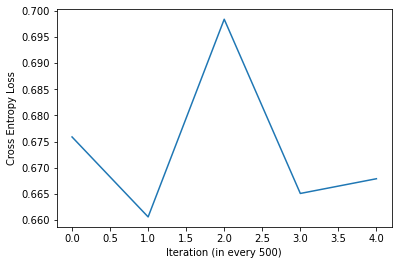

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Setting-3  : 

- **totaldata:** 30830
- **minibatch:** 50
- **iterations:** 3,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{30830}{50} = 4.86 $
- **Learning rate:** 0.002
- **Optimizer:** SGD

In [ ]:
#HYPERPERAMETERS
batch_size = 50
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.002

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.7185157537460327. Accuracy: 59.32533246837496
Iteration: 1000. Loss: 0.6861992478370667. Accuracy: 58.741485566007135
Iteration: 1500. Loss: 0.700279712677002. Accuracy: 59.130716834252354
Iteration: 2000. Loss: 0.6550695300102234. Accuracy: 59.552384041518
Iteration: 2500. Loss: 0.634984016418457. Accuracy: 59.130716834252354


[0.7185157537460327, 0.6861992478370667, 0.700279712677002, 0.6550695300102234, 0.634984016418457]


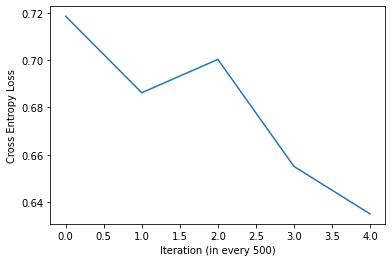

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Setting-4  : 

- **totaldata:** 30830
- **minibatch:** 50
- **iterations:** 3,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{30830}{50} = 4.86 $
- **Learning rate:** 0.002
- **Optimizer:** Adagrad

In [ ]:
#HYPERPERAMETERS
batch_size = 50
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.002

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.7078105211257935. Accuracy: 60.23353876094713
Iteration: 1000. Loss: 0.6384255886077881. Accuracy: 59.74699967564061
Iteration: 1500. Loss: 0.6543700695037842. Accuracy: 59.77943561466105
Iteration: 2000. Loss: 0.6668139696121216. Accuracy: 59.844307492701915
Iteration: 2500. Loss: 0.6665436625480652. Accuracy: 59.844307492701915


[0.7078105211257935, 0.6384255886077881, 0.6543700695037842, 0.6668139696121216, 0.6665436625480652]


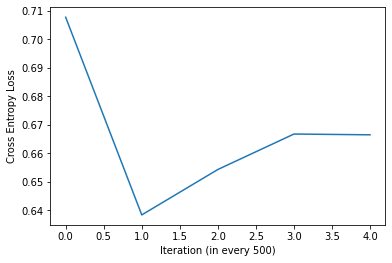

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Setting-5  : 

- **totaldata:** 30830
- **minibatch:** 150
- **iterations:** 4,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 4000 \div \frac{30830}{150} = 19.46 $
- **Learning rate:** 0.005
- **Optimizer:** SGD

In [ ]:
#HYPERPERAMETERS
batch_size = 150
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.005

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6091820001602173. Accuracy: 59.876743431722346
Iteration: 1000. Loss: 0.6431726217269897. Accuracy: 60.03892312682452
Iteration: 1500. Loss: 0.6570165753364563. Accuracy: 59.74699967564061
Iteration: 2000. Loss: 0.6448280215263367. Accuracy: 60.42815439506974
Iteration: 2500. Loss: 0.6550084948539734. Accuracy: 59.909179370742784
Iteration: 3000. Loss: 0.6480094194412231. Accuracy: 60.10379500486539
Iteration: 3500. Loss: 0.6523553729057312. Accuracy: 60.33084657800843


[0.6091820001602173, 0.6431726217269897, 0.6570165753364563, 0.6448280215263367, 0.6550084948539734, 0.6480094194412231, 0.6523553729057312]


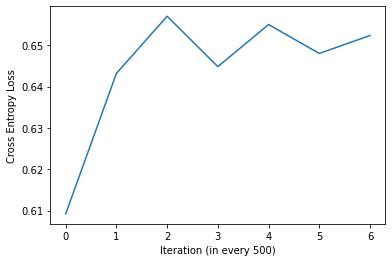

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()